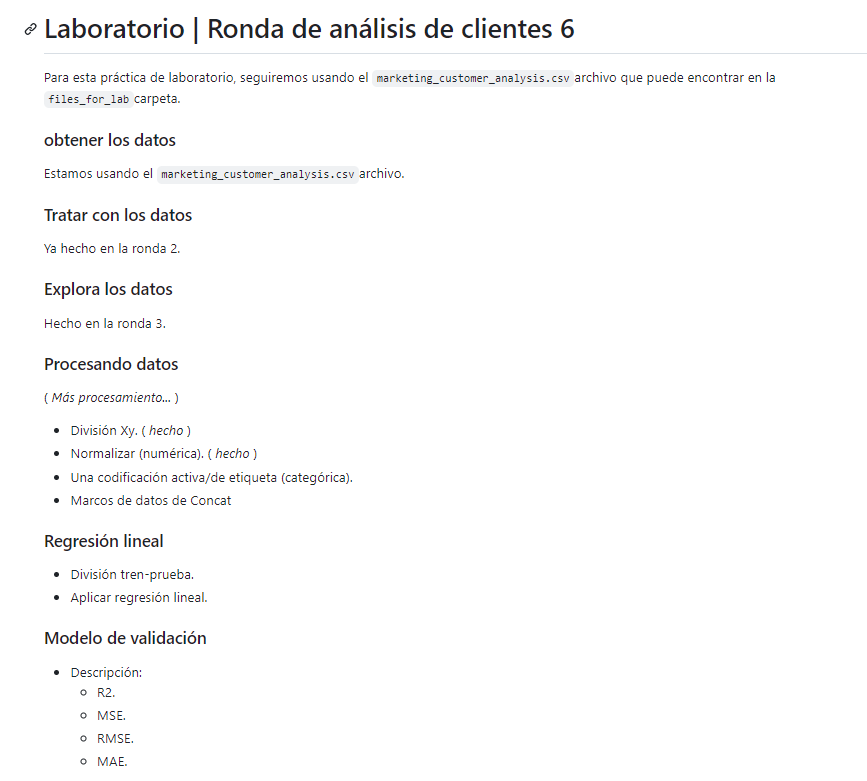

In [2]:
import pandas as pd

In [3]:
df= pd.read_csv(r'C:\Users\marco\OneDrive\Desktop\ironhack\Laboratorios\files\marketing_customer_analysis (1).csv')

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
columnas_categoricas1 = df.select_dtypes(include=['object']).columns
columnas_categoricas1

Index(['Customer', 'State', 'Response', 'Coverage', 'Education',
       'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code',
       'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [6]:
from sklearn.preprocessing import OneHotEncoder

# Seleccionar solo las columnas categoricas
columnas_categoricas = df.select_dtypes(include=['object'])
columnas_categoricas

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,2/10/11,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,2/12/11,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,2/6/11,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,2/3/11,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [7]:
# Seleccionar solo las columnas categoricas
categorical_cols = df.select_dtypes(include=['object'])

# Obtener los nombres de las columnas originales
original_columns = categorical_cols.columns.tolist()

# Inicializar el codificador one-hot
encoder = OneHotEncoder(drop='first')

# Codificar las variables categóricas
encoded_categorical_array = encoder.fit_transform(categorical_cols).toarray()

# Crear un DataFrame con las variables categóricas codificadas
encoded_categorical_cols = pd.DataFrame(encoded_categorical_array, columns=encoder.get_feature_names_out(original_columns))

# Mostrar las primeras filas de las variables categóricas codificadas
print(encoded_categorical_cols)

      Customer_AA11235  Customer_AA16582  Customer_AA30683  Customer_AA34092  \
0                  0.0               0.0               0.0               0.0   
1                  0.0               0.0               0.0               0.0   
2                  0.0               0.0               0.0               0.0   
3                  0.0               0.0               0.0               0.0   
4                  0.0               0.0               0.0               0.0   
...                ...               ...               ...               ...   
9129               0.0               0.0               0.0               0.0   
9130               0.0               0.0               0.0               0.0   
9131               0.0               0.0               0.0               0.0   
9132               0.0               0.0               0.0               0.0   
9133               0.0               0.0               0.0               0.0   

      Customer_AA35519  Customer_AA5647

In [ ]:
Una codificación activa/de etiqueta (categórica).

In [9]:
from sklearn.preprocessing import LabelEncoder


# Inicializar el codificador de etiquetas
codificar_etiquetas = LabelEncoder()

# Aplicar Label Encoding a cada columna categórica en el bucle
for col in columnas_categoricas:
    df[col] = codificar_etiquetas.fit_transform(df[col])

# Mostrar el DataFrame actualizado
print(df)

      Customer  State  Customer Lifetime Value  Response  Coverage  Education  \
0          600      4              2763.519279         0         0          0   
1         5946      0              6979.535903         0         1          0   
2           96      2             12887.431650         0         2          0   
3         8016      1              7645.861827         0         0          0   
4         2488      4              2813.692575         0         0          0   
...        ...    ...                      ...       ...       ...        ...   
9129      3857      1             23405.987980         0         0          0   
9130      5390      1              3096.511217         1         1          1   
9131      6688      1              8163.890428         0         1          0   
9132      7214      1              7524.442436         0         1          1   
9133      8434      1              2611.836866         0         1          1   

      Effective To Date  Em

Regresión lineal
División tren-prueba.
Aplicar regresión lineal.
Modelo de validación
Descripción:
R2.
MSE.
RMSE.
MAE.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# División de los datos en características (X) y variable objetivo (y)
X = df.drop('Total Claim Amount', axis=1)  # características
y = df['Total Claim Amount']  # variable objetivo

# División en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
r2 = r2_score(y_test, y_pred)  # R cuadrado
mse = mean_squared_error(y_test, y_pred)  # Error Cuadrático Medio
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Raíz del Error Cuadrático Medio
mae = mean_absolute_error(y_test, y_pred)  # Error Absoluto Medio

# Mostrar las métricas de evaluación
print("R2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R2: 0.5943440941360065
MSE: 32628.45722973376
RMSE: 180.63348867176808
MAE: 133.2374173720519


c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# División de los datos en características (X) y variable objetivo (y)
X = df.drop('Response', axis=1)  # características
y = df['Response']  # variable objetivo

# División en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de evaluación
r2 = r2_score(y_test, y_pred)  # R cuadrado
mse = mean_squared_error(y_test, y_pred)  # Error Cuadrático Medio
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Raíz del Error Cuadrático Medio
mae = mean_absolute_error(y_test, y_pred)  # Error Absoluto Medio

# Mostrar las métricas de evaluación
print("R2:", r2)
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

R2: 0.0348771802828145
MSE: 0.12005770282707874
RMSE: 0.34649343836078444
MAE: 0.23658301076275834


c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Lista para almacenar los resultados de las métricas
results = []

# Iterar sobre todas las columnas, excepto 'Response'
for column in df.columns:
    if column != 'Response':
        # División de los datos en características (X) y variable objetivo (y)
        X = df.drop(column, axis=1)  # características
        y = df[column]  # variable objetivo

        # División en conjunto de entrenamiento y conjunto de prueba (80% entrenamiento, 20% prueba)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Inicializar el modelo de regresión lineal
        model = LinearRegression()

        # Entrenar el modelo con los datos de entrenamiento
        model.fit(X_train, y_train)

        # Predicción en el conjunto de prueba
        y_pred = model.predict(X_test)

        # Calcular las métricas de evaluación
        r2 = r2_score(y_test, y_pred)  # R cuadrado
        mse = mean_squared_error(y_test, y_pred)  # Error Cuadrático Medio
        rmse = mean_squared_error(y_test, y_pred, squared=False)  # Raíz del Error Cuadrático Medio
        mae = mean_absolute_error(y_test, y_pred)  # Error Absoluto Medio

        # Almacenar las métricas en la lista de resultados
        results.append({
            'Variable objetivo': column,
            'R2': r2,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae
        })

# Convertir la lista de resultados en un DataFrame
results_df = pd.DataFrame(results)

# Mostrar los resultados
print(results_df)

c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin

                Variable objetivo        R2           MSE          RMSE  \
0                        Customer -0.005317  7.015242e+06   2648.630279   
1                           State -0.004235  1.734256e+00      1.316912   
2         Customer Lifetime Value  0.155208  4.353732e+07   6598.281561   
3                        Coverage  0.262395  3.101002e-01      0.556866   
4                       Education  0.001739  1.976771e+00      1.405977   
5               Effective To Date  0.000142  2.849469e+02     16.880371   
6                EmploymentStatus  0.582035  7.727549e-01      0.879065   
7                          Gender  0.017623  2.455041e-01      0.495484   
8                          Income  0.577530  4.089518e+08  20222.555573   
9                   Location Code  0.152858  3.157867e-01      0.561949   
10                 Marital Status  0.118997  3.568849e-01      0.597398   
11           Monthly Premium Auto  0.610037  4.315135e+02     20.772903   
12        Months Since La

c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\marco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarnin